In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("valakhorasani/mobile-device-usage-and-user-behavior-dataset")

print("Path to dataset files:", path)

100%|██████████| 11.3k/11.3k [00:00<00:00, 7.97MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset/versions/1


In [3]:
df=pd.read_csv("/root/.cache/kagglehub/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset/versions/1/user_behavior_dataset.csv")
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [4]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


# **Interpretation-**

By using the describe function, we can get following meaningfull insights about the dataset.

1. **App Usage & Screen-On Time:**
Users spend an average of around 271 minutes (or about 4.5 hours) on apps daily. The average screen-on time is approximately 5.27 hours per day. This suggests a high level of phone engagement among the users.

2. **Battery Drain:**
The average daily battery drain is 1525 mAh. The high battery drain likely corresponds to the extensive app usage and screen-on time.

3. **Data Usage:**
Users consume an average of 929 MB of data per day. This is a significant amount of data usage, indicating a reliance on data-intensive apps and activities.

4. **App Installations:**
Users have an average of 50 apps installed on their phones. This indicates a diverse range of apps used by the users.

5. **Heavy Users:**
The 75th percentile values for app usage, screen-on time, battery drain, and data usage are substantially higher than the means, suggesting the presence of "heavy users" who contribute disproportionately to overall usage.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


# **Interpretation-**

By using the info function, we can conclude that there are no null entries in the entire dataset. We also get to know the datatypes of every entry.

In [6]:
df.duplicated().sum()

0

# **Interpretation-**

This function shows that there are no duplicate entries in the dataset.

In [7]:
DeviceCount = df["Device Model"].value_counts().reset_index(name='Count')
DeviceCount

,Device Model,Count
0,Xiaomi Mi 11,146
1,iPhone 12,146
2,Google Pixel 5,142
3,OnePlus 9,133
4,Samsung Galaxy S21,133


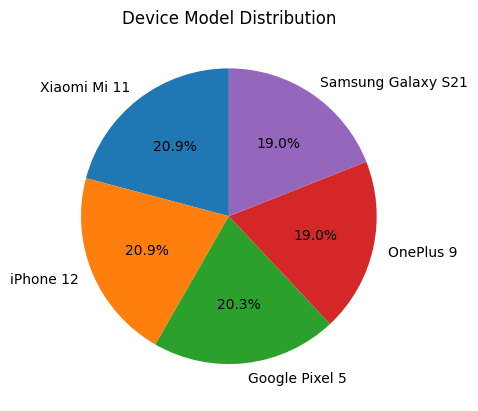

In [8]:
plt.pie(DeviceCount['Count'], labels=DeviceCount['Device Model'], autopct='%1.1f%%', startangle=90)
plt.title('Device Model Distribution')
plt.show()

# **Interpretation-**

This provides us with the unique device models used by the users and the count of same.

Xiaomi Mi 11 and iPhone12 has the highest count among the models shown, indicating that they are the most frequently observed or represented device in the dataset.

In [9]:
AvgAppUsage_byDevice = df.groupby("Device Model")["App Usage Time (min/day)"].mean().round(2).reset_index()
AvgAppUsage_byDevice

,Device Model,App Usage Time (min/day)
0,Google Pixel 5,267.79
1,OnePlus 9,270.38
2,Samsung Galaxy S21,266.42
3,Xiaomi Mi 11,268.45
4,iPhone 12,282.02


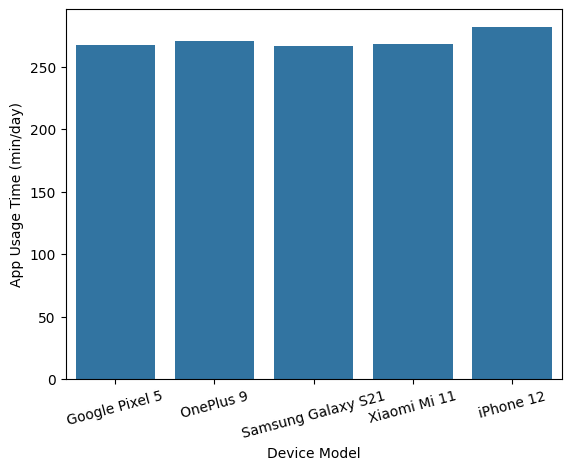

In [10]:


sns.barplot(x="Device Model", y="App Usage Time (min/day)", data=AvgAppUsage_byDevice)
plt.xticks(rotation=15)
plt.show()

# **Interpretation-**


This provides us the information about the average app usage time across the different device model.

All the models have almost similar App Usage Time (min/day). But the higher app usage on iPhone 12 and Google Pixel 5 could be attributed to factors like a strong app ecosystem, user habits within those ecosystems, or the availability of specific apps.

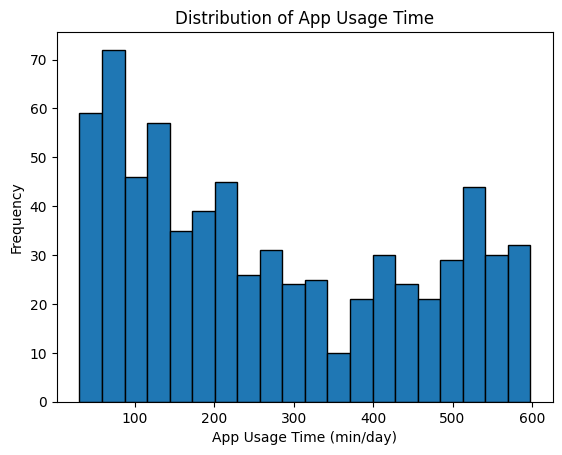

In [11]:
plt.hist(df["App Usage Time (min/day)"], bins=20, edgecolor='black')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Frequency')
plt.title('Distribution of App Usage Time')
plt.show()

# **Interpretation-**

The histogram displays the distribution of app usage time (in minutes per day).

The distribution appears to be bimodal, meaning it has two peaks.

One peak is around the 50-minute mark.
The other peak is around the 500-minute mark.
There is a relatively smaller number of users with app usage times between these two peaks.

The two peaks could represent different usage patterns. For instance, one peak might correspond to users primarily using apps for quick tasks or communication, while the other peak might represent users heavily engaged in gaming, social media, or other time-consuming activities.

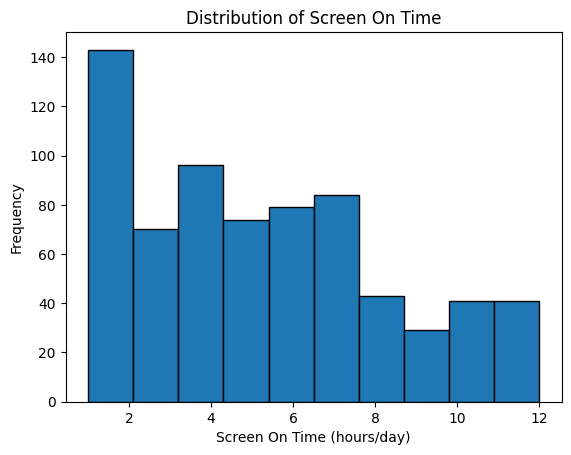

In [12]:
plt.hist(df["Screen On Time (hours/day)"], bins=10, edgecolor='black')
plt.xlabel('Screen On Time (hours/day)')
plt.ylabel('Frequency')
plt.title('Distribution of Screen On Time')
plt.show()

# **Interpretation-**

The histogram displays the distribution of screen-on time (in hours per day).

The distribution is right-skewed, meaning there is a longer tail towards higher screen-on times. This indicates that a larger proportion of users have lower screen-on times, while a smaller proportion have very high screen-on times.

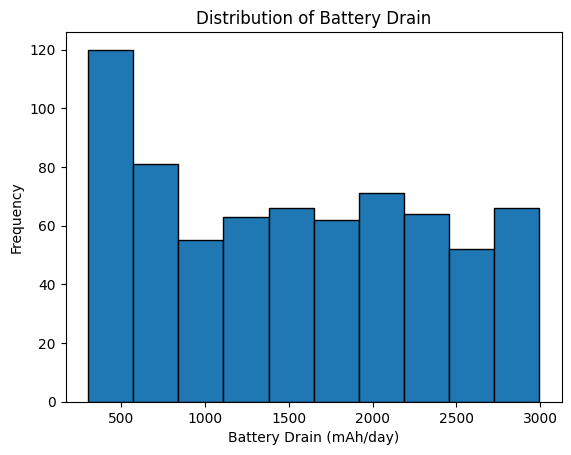

In [13]:
plt.hist(df["Battery Drain (mAh/day)"], bins=10, edgecolor='black')
plt.xlabel('Battery Drain (mAh/day)')
plt.ylabel('Frequency')
plt.title('Distribution of Battery Drain')
plt.show()

# **Interpretation-**

The histogram displays the distribution of battery drain (in mAh per day).

The distribution is right-skewed, meaning there is a longer tail towards higher battery drain values. This indicates that a larger proportion of users have lower battery drain, while a smaller proportion have very high battery drain.

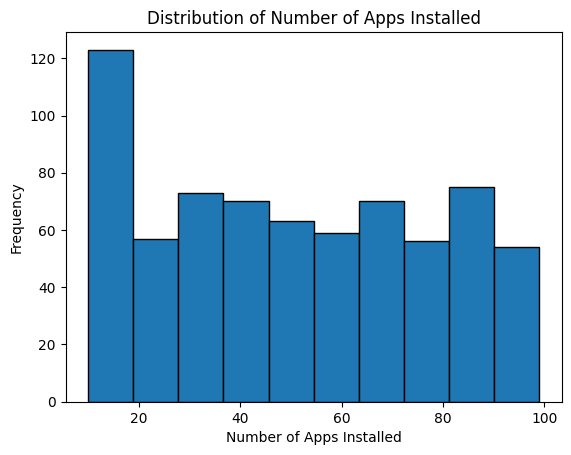

In [14]:
plt.hist(df["Number of Apps Installed"], bins=10, edgecolor='black')
plt.xlabel('Number of Apps Installed')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Apps Installed')
plt.show()

# **Interpretation-**

The histogram displays the distribution of the number of apps installed on devices.

The distribution has a peak around 10-20 apps installed, suggesting that a significant number of users have this range of apps installed. As we move towards higher numbers of installed apps, the frequency gradually decreases, indicating that fewer users have a very large number of apps installed. But clubbing the number of installed apps together tells us that many users have variety of apps installed on their mobile phones.

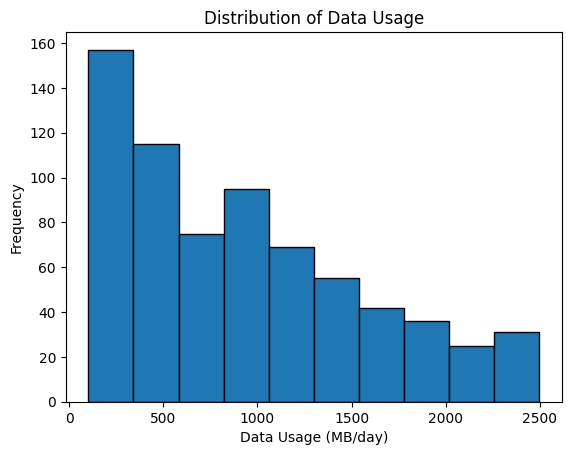

In [15]:
plt.hist(df["Data Usage (MB/day)"], bins=10, edgecolor='black')
plt.xlabel('Data Usage (MB/day)')
plt.ylabel('Frequency')
plt.title('Distribution of Data Usage')
plt.show()

# **Interpretation-**

The histogram displays the distribution of data usage (in MB per day).

The distribution has a peak around 250 MB of data usage, suggesting that a significant number of users fall within this range. There is a longer tail towards lower data usage values. This indicates that a larger proportion of users have lower data usage, while a smaller proportion have very high data usage.

In [16]:
BehaviourCount = df["User Behavior Class"].value_counts().reset_index()
BehaviourCount

,User Behavior Class,count
0,2,146
1,3,143
2,4,139
3,5,136
4,1,136


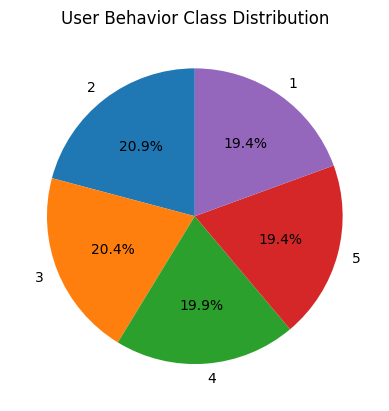

In [33]:
plt.pie(BehaviourCount['count'], labels=BehaviourCount['User Behavior Class'], autopct='%1.1f%%', startangle=90)
plt.title('User Behavior Class Distribution')
plt.show()

# **Interpretation-**

The chart shows the distribution of users across different User Behavior Classes.

The chart reveals a relatively even distribution of users across the five User Behavior Classes. Class 2 and 3 has the highest count, indicating that it has the largest number of users. The remaining classes (1, 4, and 5) have comparable counts, with slight variations.

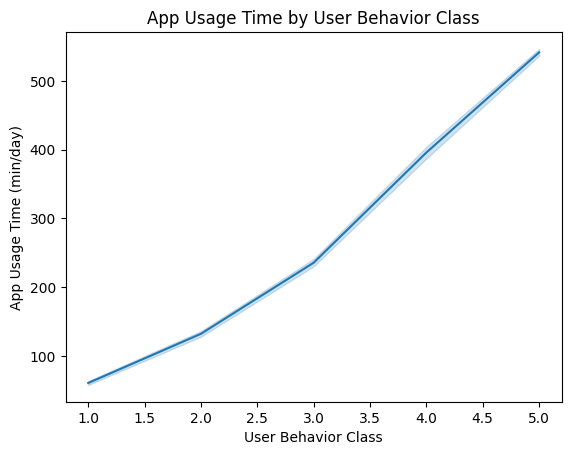

In [18]:
sns.lineplot(data=df, x="User Behavior Class", y="App Usage Time (min/day)")
plt.title("App Usage Time by User Behavior Class")
plt.xlabel("User Behavior Class")
plt.ylabel("App Usage Time (min/day)")
plt.show()

# **Interpretation-**

The graph shows the relationship between App Usage Time (in minutes per day) and User Behavior Class.

The line graph shows a clear upward trend, indicating that users in higher User Behavior Classes tend to spend significantly more time on apps compared to those in lower classes. This trend suggests that User Behavior Classes might be associated with different levels of app usage intensity. Users in higher classes might be more engaged with their devices and spend more time using apps for various purposes.

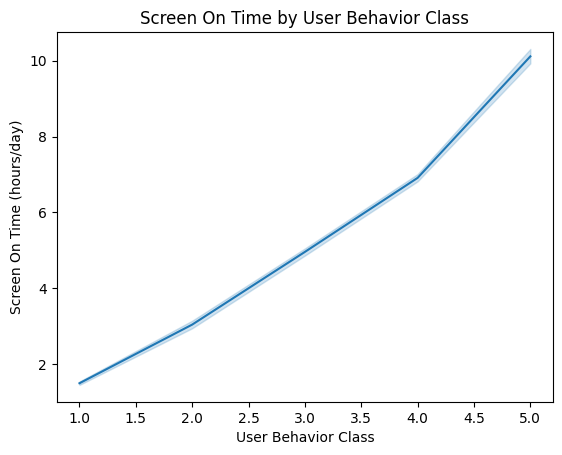

In [19]:
sns.lineplot(data=df, x="User Behavior Class", y="Screen On Time (hours/day)")
plt.title("Screen On Time by User Behavior Class")
plt.xlabel("User Behavior Class")
plt.ylabel("Screen On Time (hours/day)")
plt.show()

# **Interpretation-**

The graph shows the relationship between Screen On Time (in hours per day) and User Behavior Class.

The line graph shows a clear upward trend, indicating that users in higher User Behavior Classes tend to have significantly longer screen-on times compared to those in lower classes. This trend suggests that User Behavior Classes might be associated with different levels of screen time usage intensity. Users in higher classes might be more engaged with their devices and spend more time with their screens on for various purposes.

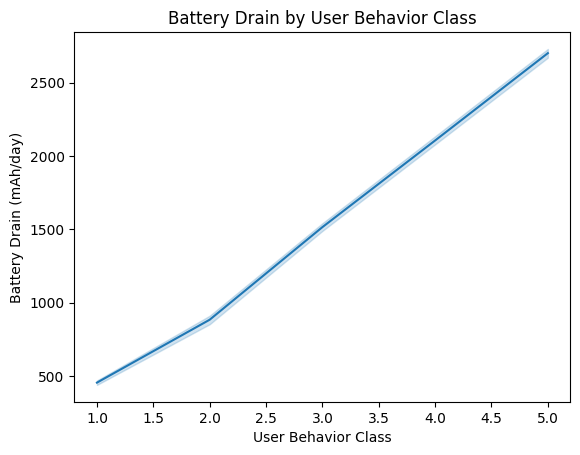

In [20]:
sns.lineplot(data=df, x="User Behavior Class", y="Battery Drain (mAh/day)")
plt.title("Battery Drain by User Behavior Class")
plt.xlabel("User Behavior Class")
plt.ylabel("Battery Drain (mAh/day)")
plt.show()

# **Interpretation-**

The graph shows the relationship between Battery Drain (in mAh per day) and User Behavior Class.

The line graph shows a clear upward trend, indicating that users in higher User Behavior Classes tend to have significantly higher battery drain compared to those in lower classes. This trend suggests that User Behavior Classes might be associated with different levels of device usage intensity. Users in higher classes might be more engaged with their devices, leading to higher app usage, screen-on time, and consequently, higher battery drain.

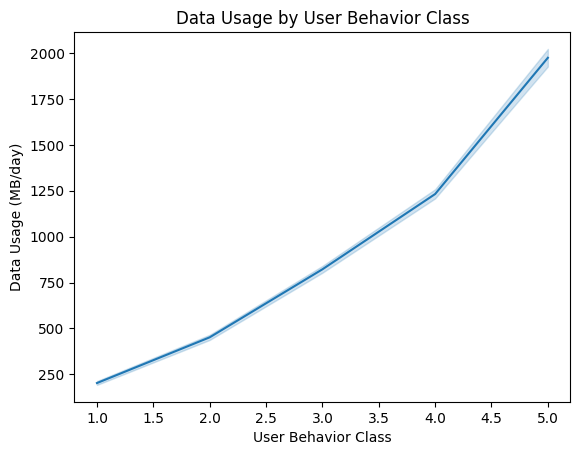

In [21]:
sns.lineplot(data=df, x="User Behavior Class", y="Data Usage (MB/day)")
plt.title("Data Usage by User Behavior Class")
plt.xlabel("User Behavior Class")
plt.ylabel("Data Usage (MB/day)")
plt.show()

# **Interpretation-**

The graph shows the relationship between Data Usage (in MB per day) and User Behavior Class.

The line graph shows a clear upward trend, indicating that users in higher User Behavior Classes tend to have significantly higher data usage compared to those in lower classes. This trend suggests that User Behavior Classes might be associated with different levels of data usage intensity. Users in higher classes might be more engaged with their devices, leading to higher app usage, streaming, downloads, and consequently, higher data consumption.

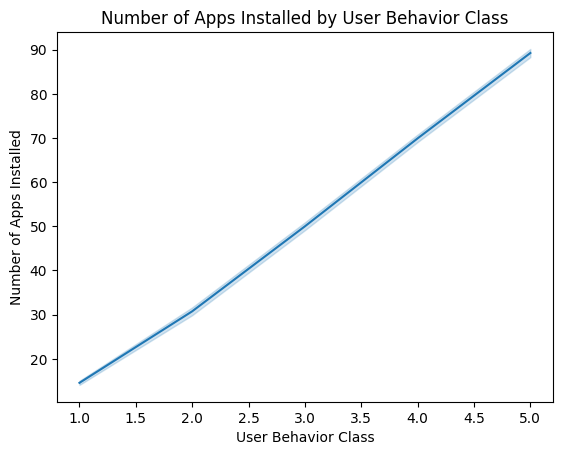

In [22]:
sns.lineplot(data=df, x="User Behavior Class", y="Number of Apps Installed")
plt.title("Number of Apps Installed by User Behavior Class")
plt.xlabel("User Behavior Class")
plt.ylabel("Number of Apps Installed")
plt.show()

# **Interpretation-**

The graph shows the relationship between the Number of Apps Installed and User Behavior Class.

The line graph shows a clear upward trend, indicating that users in higher User Behavior Classes tend to have a significantly higher number of apps installed compared to those in lower classes. This trend suggests that User Behavior Classes might be associated with different app installation behaviors. Users in higher classes might be more inclined to explore and install a wider range of apps.